In [1]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
#from feature import *
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.collections import PolyCollection
import os
#import PyQt4
%matplotlib inline

# 2D Presentation

In [2]:
def selection():
    features = ['eventid', 'iyear', 'extended', 'country_txt', 'region_txt', 'city', 
                         'latitude', 'longitude', 'doubtterr', 'multiple', 'success', 'suicide', 
                         'attacktype1', 'attacktype1_txt',
                         'targtype1', 'targtype1_txt',
                         'weaptype1', 'weaptype1_txt',
                         'nkill', 'nwound', 'property']
    return features


def make_list(dataset, col_name):
    new_list = []
    
    for i in dataset[col_name].values.tolist():
        new_list.append(i)
        
    return np.array(new_list)


def make_log_list(dataset, col_name):
    new_list = []
    
    for i in dataset[col_name].values.tolist():
        new_list.append(np.log(i))
        
    return np.array(new_list)


def find_null(dataset, col_name):
    df_null = dataset[dataset[col_name].isnull()]
    return df_null


def get_rid_of_null(dataset, col_name):
    df_not_null = dataset[dataset[col_name].notnull()]
    return df_not_null


In [3]:
def plot_2D_density(dataset):
    plt.figure(figsize=(18,15))
    m = Basemap(projection='mill', llcrnrlon=-180, urcrnrlon=180,\
                llcrnrlat=-70, urcrnrlat=85, resolution='c', )

    m.drawcountries(linewidth=0.5, linestyle='solid', color='w', antialiased=1, ax=None, zorder=None)
    m.fillcontinents()
    m.drawmapboundary()

    lat = make_list(dataset, 'latitude')
    lon = make_list(dataset, 'longitude')

    x,y = m(lon, lat)
    m.plot(x, y, 'r.', marker='.', markersize=3, alpha=.5)

    plt.title('Global Attack Density: 1970-2015')
    plt.show()

In [4]:
os.getcwd()
df = pd.read_csv('wholedata_selected.csv', index_col=0)

In [5]:
df.shape

(156772, 21)

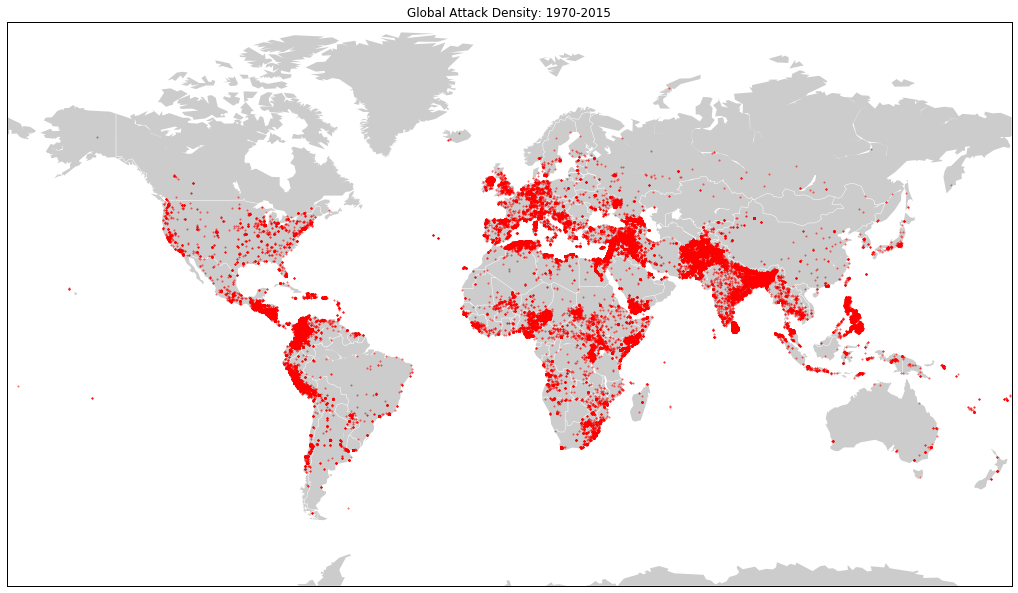

In [6]:
plot_2D_density(df)

# 3D Presentation

You may not be able to turn the 3D map up and down, back and forth on Jupyter Notebook because in this package the output is static, but it is doable on pop-up windows.

In [14]:
# User can choose a year between 1970 to 2015
def select_by_year(dataset):
    year = input('Please choose a year between 1970 to 2015: ')
    return dataset[(dataset['iyear']) == int(year)]

# allow users to select a dateframe by choosing starting and ending years between 1970 to 2015
def select_btw_years(dataset):
    year1 = input('Please choose the beginning year between 1970 to 2015: ')
    year2 = input('Please choose the ending year between 1970 to 2015: ')
    return dataset[dataset.iyear.isin(range(int(year1), int(year2)+1))]

def get_geolocs(dataset):
    lons = make_list(dataset, 'longitude')
    lats = make_list(dataset, 'latitude')
    return lons, lats

def choose_feature(dataset, col_name):
    feature_shown = make_log_list(dataset, col_name)
    return feature_shown

def plot_bar3d(dataset, feature_name):
    geo_locs = get_geolocs(dataset)
    feature = choose_feature(dataset, feature_name)
    ax.bar3d(geo_locs[0], geo_locs[1], np.zeros(len(geo_locs[0])), 1, 1, feature, color= 'red', alpha=0.08, edgecolor='r')

def show_3d(dataset, col_name):
    plot_bar3d(get_rid_of_null(dataset, col_name), col_name)
    plt.title('Numbers of {} by Terrorism Attack'.format(col_name))
    plt.show()
    
    
"""
This function allow users to choose whether they want to choose:
    1) a single year, or 
    2) a multi-year time period 
to present feature occurrence patterns
"""
def one_or_more_yr(dataset):
    choice = input('To view by a single year, please enter "s"; by multiple continuous years, please enter "m".\nPlease enter: ')
    if choice.lower() == 's':
        return select_by_year(dataset)
    elif choice.lower() == 'm':
        return select_btw_years(dataset)
    else:
        raise ValueError  # Or to define a self-named error type, eg. InputError

To view by a single year, please enter "s"; by multiple continuous years, please enter "m".
Please enter: m
Please choose the beginning year between 1970 to 2015: 1972
Please choose the ending year between 1970 to 2015: 1974


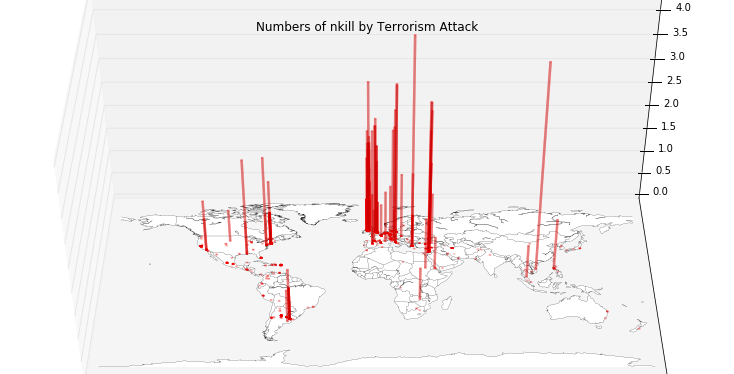

In [13]:
m = Basemap()

fig = plt.figure(figsize=(10,10))
ax = Axes3D(fig)

ax.azim = 270
ax.elev = 40
ax.dist = 7
#ax.set_axis_off()

polys = []
for polygon in m.landpolygons:
    polys.append(polygon.get_coords())

lc = PolyCollection(polys, edgecolor='white', facecolor='#FFFFFF', closed=False)

ax.add_collection3d(lc)
ax.add_collection3d(m.drawcoastlines(linewidth=0.1))
ax.add_collection3d(m.drawcountries(linewidth=0.1))

df3 = one_or_more_yr(df)

lons, lats = get_geolocs(df3)
x, y = m(lons, lats)

plot_bar3d(df3, 'nkill')
show_3d(df3, 'nkill')